### This jupyter notebook has 3 functions:
    1) Authprization with Google
    2) Image/file download
    3) Show image

### Imports:

In [26]:
from apiclient import discovery
from httplib2 import Http
import oauth2client
from oauth2client import file, client, tools
import io
from googleapiclient.http import MediaIoBaseDownload
import skimage
import skimage.io as sio
import matplotlib.pyplot as plt
import os
%load_ext pycodestyle_magic
%pycodestyle_on

### Google Authorization:

I used this [tutorial](https://medium.com/@umdfirecoml/a-step-by-step-guide-on-how-to-download-your-google-drive-data-to-your-jupyter-notebook-using-the-52f4ce63c66c) for reference 

* The function below accesses Google Drive to verify your credentials.
* Once you run it, you should get a link, open this link in a web browser and load your Google credentials as requested.
* Once ok, you will get a verification code, copy it and insert it in a window in this jupyter notebook.

This file below `client_id.json` has to be saved in the same folder as this Jupyter Notebook, otherwise looks like Authorization won't work. \
I will not upload it to GitHub, but I will share the file with you through Slack so we could test my code.

In [ ]:
# credentials=['/Users/elenashoushpanova/Desktop/DIRECT/Crystal_Math/client_id.json']

In [2]:
def google_authorization():
    """
    This function accesses Google Drive to verify your credentials.
    Once you run it, you should get a link, open this link in a web browser
    and use your Google credentials as requested. Once your cridentials
    accepted by Google, you will geta verification code.
    Copy this code and insert it in a window as requested.
    Once done, you are ready to access files in Google Drive.
    """

    from apiclient import discovery
    from httplib2 import Http
    import oauth2client
    from oauth2client import file, client, tools

    obj = lambda: None
    lmao = {"auth_host_name":'localhost', 'noauth_local_webserver':'store_true',
            'auth_host_port':[8080, 8090], 'logging_level':'ERROR'}
    for k, v in lmao.items():
        setattr(obj, k, v)

    # authorization boilerplate code
    SCOPES = 'https://www.googleapis.com/auth/drive.readonly'
    store = file.Storage('token.json')
    # store = file.Storage('client_id.json')
    creds = store.get()
    # The following will give you a link if token.json does not exist, the link
    # allows the user to give this app permission
    if not creds or creds.invalid:
        flow = client.flow_from_clientsecrets('client_id.json', SCOPES)
        #flow = client.flow_from_clientsecrets(credentials, SCOPES)
        creds = tools.run_flow(flow, store, obj)
    return creds

In [3]:
google_authorization()

### File download:

* Now after Google "knows" you, try to download any file from Google Drive.
* Before running the cell below, make sure the replace the `file_id` and `filename` fields to the **file_id** and **filename** that you are downloading
* To get the file ID, go to the file in your Google Drive, right click to select **Get Shareable link**.
* If you paste this link in the web browser URL bar, the file id is in the end of the address string: ".....id=<font color=red>file-id-is-here</font>".
* The file specified here right now is a pptx file from Google Drive, you can run it as it is or replace by other file.

In [11]:
def file_download(google_shareable_link, output_filename, output_directory):
    """
    This function downloads a file from Google Drive and stores it in a local
    directory.
    Inputs for the function are:
    (1) "Shareable link" from Google Drive provided as a string.
        Example: google_shareable_link =
        'https://drive.google.com/open?id=1cFi0rOqN8bcJ7H5fpfPAGS5Rem7TtiII'
        ***To get the link: go to the file in your Google Drive, right click,
        select "Get Shareable link".
    (2) Output file name including file extension provided as a string.
        Example: output_filename = 'Hexagonal_18.bmp'
    (3) Output Directory path provided as a string.
        Example: output_directory = '/Users/elenashoushpanova/Desktop/'
    Output for the function is a file path of saved file.
        Example: dir_file = '/Users/elenashoushpanova/Desktop/Hexagonal_18.bmp'

    Note: this function calls for a "google_authorization" function.
    """

    # Call for a google authorization function to get Google Credentials.
    # Will need a name change to "crystalmath":
    creds = google_authorization()

    # Define Google Drive as a source of file:
    DRIVE = discovery.build('drive', 'v3', http=creds.authorize(Http()))

    # Converts Google Shareable link that function got in Inpout into
    # "file id":
    loc = google_shareable_link.find('id=') + 3
    file_id = google_shareable_link[loc:]

    # Access a file:
    request = DRIVE.files().get_media(fileId=file_id)

    # Merging output directory and file name to get a local file path:
    directory = os.path.dirname(output_directory)
    image_path = os.path.join(directory, output_filename)
    
    # Saving a file:
    fh = io.FileIO(image_path, mode='w')
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while done is False:
        status, done = downloader.next_chunk()
        print("Download %d%%." % int(status.progress() * 100))
    return image_path

In [12]:
file_download('https://drive.google.com/open?id='
              '1cFi0rOqN8bcJ7H5fpfPAGS5Rem7TtiII', 'Hexagonal_18.bmp',
              '/Users/elenashoushpanova/Desktop/')

Download 100%.


'/Users/elenashoushpanova/Desktop/Hexagonal_18.bmp'

### Show Image (from local directory):

In [38]:
def set_image_path(image_path):
    """
    This function loads image from a local directory into a numpy array.
    Input is an image file path.
    Output is a numpy array of image pixel values, as well as shows the
    image itself.
    """

    image = sio.imread(image_path)
    sio.imshow(image)
    plt.axis('off')
    return image

Download 100%.


Array([[179, 176, 181, ..., 185, 188, 177],
       [178, 177, 180, ..., 183, 182, 171],
       [179, 182, 186, ..., 175, 171, 171],
       ...,
       [181, 184, 176, ..., 180, 175, 181],
       [185, 186, 179, ..., 183, 178, 178],
       [183, 185, 182, ..., 187, 178, 181]], dtype=uint8)

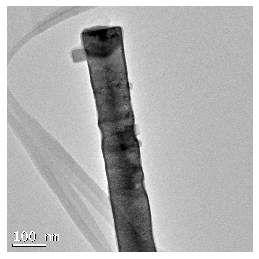

In [39]:
image_path = file_download('https://drive.google.com/open?id='
                           '1cFi0rOqN8bcJ7H5fpfPAGS5Rem7TtiII',
                           'Hexagonal_18.bmp',
                           '/Users/elenashoushpanova/Desktop/')
set_image_path(image_path)

### Set image (download from Google Drive and Show):

In [34]:
def set_google_image(google_shareable_link, output_filename, output_directory):
    """
    This function is similar to "set_image_path", but it downloads an image
    from the Google Drive first and then loads the local copy into a numpy
    array.
    Inputs for the function are:
    (1) "Shareable link" from Google Drive provided as a string.
        Example: google_shareable_link =
        'https://drive.google.com/open?id=1cFi0rOqN8bcJ7H5fpfPAGS5Rem7TtiII'
        ***To get the link: go to the file in your Google Drive, right click,
        select "Get Shareable link".
    (2) Output file name including file extension provided as a string.
        Example: output_filename = 'Hexagonal_18.bmp'
    (3) Output Directory path provided as a string.
        Example: output_directory = '/Users/elenashoushpanova/Desktop/'
    Output is an array of image pixel values, image pixel resolution, as well
    as the image itself.

    Note: this function call for "file_download" and "set_image_path"
    functions.
    """

    # Call for a "file_download" function: ############ Will need a name change
    # to "crystalmath."
    dir_file = file_download(google_shareable_link, output_filename,
                             output_directory)

    # Call for a "show_image" function: ############ Will need a name change
    # to "crystalmath"
    image = set_image_path(dir_file)
    return image, image.shape

Download 100%.


(Array([[179, 176, 181, ..., 185, 188, 177],
        [178, 177, 180, ..., 183, 182, 171],
        [179, 182, 186, ..., 175, 171, 171],
        ...,
        [181, 184, 176, ..., 180, 175, 181],
        [185, 186, 179, ..., 183, 178, 178],
        [183, 185, 182, ..., 187, 178, 181]], dtype=uint8), (2048, 2048))

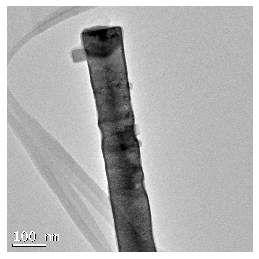

In [36]:
set_google_image('https://drive.google.com/open?id='
                 '1cFi0rOqN8bcJ7H5fpfPAGS5Rem7TtiII',
                 'Hexagonal_18.bmp', '/Users/elenashoushpanova/Desktop/')

### Set crystal type:

In [29]:
def set_tructure(crystal_structure):
    """
    This function is getting user's input for a crystal structure of his/her
    TEM crystal.
    Input: choose one of the following inputs: BCC, FCC, HCP, diamond.
    Output: same as input but as variable.
    """

    cs = crystal_structure
    if cs == 'BCC' or cs == 'FCC' or cs == 'HCP':
        print('Thanks!')
    else:
        print("Please set crystal structure according to one of the following:"
              "BCC, FCC, or HCP")
    return cs

In [30]:
set_tructure('HCP')

Thanks!


'HCP'

### Test <font color=blue>set_tructure</font> function

In [40]:
def test_set_tructure():
    structure = set_tructure('FCC')
    assert type(structure) == str,\
        "Please input a string for crystal structure name"

### Compare angles:

In [42]:
def compare_angles(angles_from_fft, angles_from_structure_data):
    """
    This function compares angles obtained from FFT image (an output
    from "angles_from_fft" function) and angles calculated from structural
    data base (angles_from_structure_data).
    Input is a numpy array of angles_from_fft and numpy array of
    angles_from_structure_data.
    Output is a
    """